In [87]:
import numpy as np
from math import sqrt

In [88]:
population = np.random.uniform(2, 5, 1000000)
print("Population mean = ", population.mean())
print("Population variance = ", population.var())

Population mean =  3.5011791226738254
Population variance =  0.7496311574244577


In [89]:
sample_size = 50
number_of_samples = 10000

In [90]:
samples = np.random.choice(population, size=(number_of_samples, sample_size))
print(samples.shape)

(10000, 50)


In [91]:
avg_of_samples = samples.mean(axis= 1)
print(avg_of_samples.shape)
overall_avg = avg_of_samples.mean()
print(overall_avg)

(10000,)
3.4992953321973315


In [92]:
variance_of_samples = avg_of_samples.var()
print(variance_of_samples.shape)
print(variance_of_samples)

()
0.01452904597114557


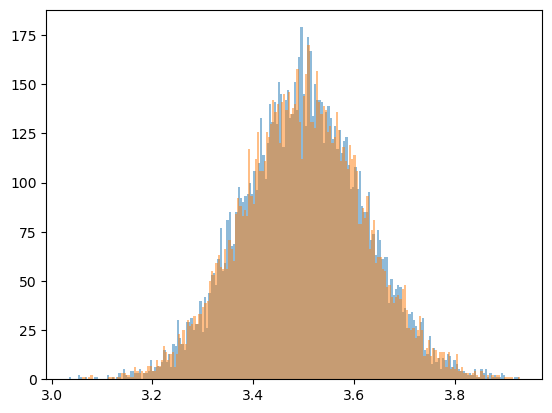

In [93]:
import matplotlib.pyplot as plt
plt.hist(avg_of_samples, bins= 200, alpha= 0.5)

#####################################################

normal = np.random.normal(overall_avg, sqrt(variance_of_samples), number_of_samples)
plt.hist(normal, bins= 200, alpha= 0.5)
plt.show()


In [104]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm


def CI_X(X_bar, n, var, CL):

    SE = np.sqrt(var / n)
    print("SE = ",SE)
    # Standard Error #

    alpha = 1 - CL / 100
    print("alpha = ",alpha)
    
    if n < 30:
        degrees_of_freedom = n - 1
        print("degree of freedom = ",degrees_of_freedom)
        t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)
        print("t_critical = ",t_critical)
        margin_of_error = t_critical * SE
    else:
        z_critical = norm.ppf(1 - alpha / 2)
        print("z_critical = ",z_critical)
        margin_of_error = z_critical * SE
    
    print("margin_of_error = ",margin_of_error)    
    lower_bound = X_bar - margin_of_error
    upper_bound = X_bar + margin_of_error

    return lower_bound, upper_bound



In [113]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm

def CI_P(P_hat, n, CL):

    ESE = np.sqrt((P_hat * (1 - P_hat)) / n)
    print("ESE = ", ESE)
    # Standard Error #
    
    alpha = 1 - CL / 100
    print("alpha = ",alpha)

    if n < 30:
        degrees_of_freedom = n - 1
        print("degree of freedom = ",degrees_of_freedom)
        t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)
        print("t_critical = ",t_critical)
        margin_of_error = t_critical * ESE
    else:
        z_critical = norm.ppf(1 - alpha / 2)
        print("z_critical = ",z_critical)
        margin_of_error = z_critical * ESE
        
    print("margin_of_error = ",margin_of_error)    
    lower_bound = P_hat - margin_of_error
    upper_bound = P_hat + margin_of_error

    return lower_bound, upper_bound


In [114]:
print(CI_X(1000, 60, 40000, 95))

SE =  25.81988897471611
alpha =  0.050000000000000044
z_critical =  1.959963984540054
margin_of_error =  50.6060524752664
(949.3939475247336, 1050.6060524752663)


In [115]:
print(CI_P(0.67, 850, 95))

ESE =  0.016128163164440754
alpha =  0.050000000000000044
z_critical =  1.959963984540054
margin_of_error =  0.031610618939089424
(0.6383893810609106, 0.7016106189390895)


In [116]:
print(CI_P(0.25, 50, 99))

ESE =  0.06123724356957945
alpha =  0.010000000000000009
z_critical =  2.5758293035489004
margin_of_error =  0.1577366864550842
(0.09226331354491579, 0.4077366864550842)


In [117]:
print(CI_X(0.5, 10, 0.09, 95))

SE =  0.09486832980505137
alpha =  0.050000000000000044
degree of freedom =  9
t_critical =  2.2621571627409915
margin_of_error =  0.21460707178577165
(0.28539292821422835, 0.7146070717857717)
